# Percentage of fiction volumes labeled fiction

In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from collections import Counter
import seaborn as sns

In [3]:
work = pd.read_csv('../manuallists/manual_title_subset.tsv', sep = '\t', index_col = 'docid', low_memory=False)
work.head()

,author,realname,pseudonym,gender,nationality,authordate,inferreddate,firstpub,latestcomp,allcopiesofwork,copiesin25yrs,enumcron,imprint,genres,subjects,shorttitle,category,hathiadvent
docid,,,,,,,,,,,,,,,,,,
mdp.49015000838012,"Fraser, Peter",NaN,NaN,m,us,1932-,1971,1971,1971,1,1,NaN,Boston|Plays inc.|1971,Bibliographies|NotFiction,Puppet theater,Puppet circus,notfiction,contemporary
mdp.39015063561586,"Ferrier, Susan","Ferrier, Susan Edmonstone",NaN,f,uk,1782-1854.,1818,1818,1818,5,3,v.2,Edinburgh;W. Blackwood and J. Murray;1818.,Bibliographies|Fiction,English fiction,"Marriage, a novel",longfiction,contemporary
uiuo.ark+=13960=t8nc6b618,"Neri, Mary Anne","Neri, Mary Anne",NaN,f,it,NaN,1804,1804,1804,1,1,v.1,London;Printed for T. Cadell and W. Davies by ...,Novel|Fiction,NaN,The eve of San-Pietro,longfiction,contemporary
uc1.$b473613,"Mann, Erika","Mann, Erika",NaN,f,de,1905-1969.,1940,1940,1940,1,1,NaN,"New York|Toronto|Farrar & Rinehart, inc.|c1940",NotFiction,Social life and customs,The lights go down,longfiction,contemporary
nyp.33433074931597,"Forrester, Charles Robert","Forrester, Charles Robert","Crowquill, Alfred; Willis, Hal",m,uk,1803-1850.,1843,1843,1843,2,2,v. 2,London;R. Bentley;1843.,NotFiction,NaN,Phantasmagoria of fun,juvenile,contemporary


In [4]:
work.columns

Index(['author', 'realname', 'pseudonym', 'gender', 'nationality',
       'authordate', 'inferreddate', 'firstpub', 'latestcomp',
       'allcopiesofwork', 'copiesin25yrs', 'enumcron', 'imprint', 'genres',
       'subjects', 'shorttitle', 'category', 'hathiadvent'],
      dtype='object')

In [5]:
allgenres = Counter()
for index, row in work.iterrows():
    if pd.isnull(row.genres):
        continue
    g = set(row.genres.split('|'))
    for genre in g:
        allgenres[genre] += 1
print(allgenres.most_common(25))

[('Fiction', 1361), ('NotFiction', 876), ('UnknownGenre', 100), ('Juvenile audience', 71), ('Bibliographies', 59), ('Novel', 54), ('Historical fiction', 21), ('Short stories', 19), ('ContainsBiogMaterial', 15), ('Domestic fiction', 15), ('Detective and mystery stories', 13), ('Psychological fiction', 12), ('Love stories', 11), ('Mystery fiction', 9), ('War stories', 8), ('Biography', 6), ('Science fiction', 5), ('Bildungsromans', 4), ('Humorous stories', 4), ('Juvenile literature', 4), ("Publishers' advertisements", 4), ('Western stories', 3), ('NotBiographical', 3), ('Humorous fiction', 3), ('Suspense fiction', 3)]


In [11]:
alltitles = Counter()
fictiontitles = Counter()
ficclues = {'Fiction', 'Novel', 'Short stories', 'Domestic fiction', 'Love stories', 
            'Historical fiction', 'Psychological fiction', "Detective and mystery stories",
           "Mystery fiction"}
fictiondefinition = {'longfiction', 'shortfiction', 'juvenile'}

for index, row in work.iterrows():
    if not row.category in fictiondefinition:
        continue
    date = int(row.latestcomp)
    alltitles[date] += 1
    
    if pd.isnull(row.genres):
        continue
    g = set(row.genres.split('|'))
    fiction = False
    for genre in g:
        if genre in ficclues:
            fiction = True
            break
    if fiction:
        fictiontitles[date] += 1

        

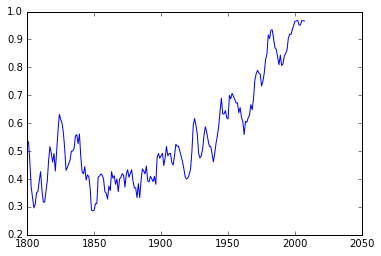

In [12]:
x = []
y = []
for i in range(1800, 2008):
    fiction5yr = 0
    all5yr = 0
    for j in range(i - 2, i + 3):
        if j in alltitles and alltitles[j] > 0:
            fiction5yr += fictiontitles[j]
            all5yr += alltitles[j]
            
    if all5yr > 0:
        ratio = fiction5yr / all5yr
    else:
        ratio = 0
        
    x.append(i)
    y.append(ratio)
plt.plot(x, y)

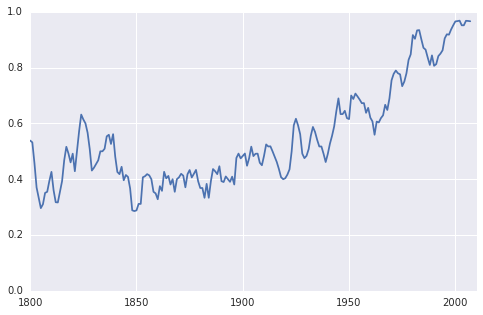

In [24]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (8, 5))
ax = plt.plot(x, y)
plt.xlim(1800, 2010)
plt.ylim(0,1)
plt.savefig('percentlabeledfic.png', dpi = 400, bbox_inches = 'tight')
plt.show()

In [23]:
thesum = 0
for k, v in alltitles.items():
    thesum += v
thesum

2496